# **Coffee Sales Performance Analysis**

**Project Type:** ML + SQL + Excel  
**Tools Used:** Python, Pandas, Matplotlib, Seaborn  
**Author:** _Sanya Sharma_  
**Date:** 25 June 2025



---



### 1. Install Required Libraries

In [1]:

!pip install pandas scikit-learn matplotlib seaborn openpyxl

### 2. Import Required Libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


### 3. Upload and Load the Excel File

In [4]:

from google.colab import files
uploaded = files.upload()

Saving Raw Dataset.xlsx to Raw Dataset.xlsx


### 4. Load Specific Sheet

In [6]:

df = pd.read_excel("Raw Dataset.xlsx")

In [7]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1.0,2023-01-01 00:00:00,07:06:11,2.0,5.0,Lower Manhattan,32.0,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2.0,2023-01-01 00:00:00,07:08:56,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3.0,2023-01-01 00:00:00,07:14:04,2.0,5.0,Lower Manhattan,59.0,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4.0,2023-01-01 00:00:00,07:20:24,1.0,5.0,Lower Manhattan,22.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5.0,2023-01-01 00:00:00,07:22:41,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


### 5. Clean Data


In [8]:

df = df[pd.to_datetime(df['transaction_date'], errors='coerce').notna()]
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df.dropna(inplace=True)

### 6. Feature Engineering

In [9]:

df['revenue'] = df['transaction_qty'] * df['unit_price']
df['month'] = df['transaction_date'].dt.month
df['hour'] = df['transaction_date'].dt.hour
df['weekday'] = df['transaction_date'].dt.weekday

### 7. Select Features and Target

In [10]:

X = df[['transaction_qty', 'unit_price', 'month', 'hour', 'weekday']]
y = df['revenue']

### 8. Train-Test Split

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 9. Train Linear Regression Model

In [12]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 10. Make Predictions

In [13]:

y_pred = model.predict(X_test)

### 11. Evaluate Model

In [14]:

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.47395539989959706
R² Score: 0.6082362830446406


### 12. Visualize Predictions

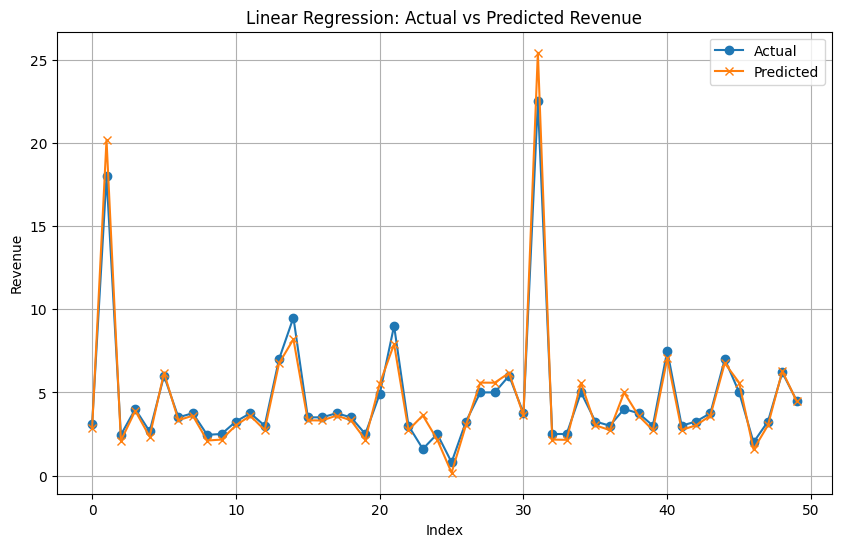

In [15]:

plt.figure(figsize=(10,6))
plt.plot(y_test.values[:50], label="Actual", marker='o')
plt.plot(y_pred[:50], label="Predicted", marker='x')
plt.title("Linear Regression: Actual vs Predicted Revenue")
plt.xlabel("Index")
plt.ylabel("Revenue")
plt.legend()
plt.grid()
plt.show()



---

